# K-Means algorithm

In [1]:
#pip install scikit-learn --upgrade

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Exploring 1000 song dataset

In [3]:
df_1000 = pd.read_csv(r'df_audio_features_1000.csv')

In [4]:
df_1000.drop(['type','id','html'],axis=1, inplace=True)

In [5]:
df_1000.set_index('name', inplace=True)

In [6]:
df_1000

,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
name,,,,,,,,,,,,,,
All Shook Up,Elvis Presley,0.6240,0.46800,10,-12.162,1,0.1320,0.881,0.000006,0.1440,0.9520,74.139,117080,4
I've Got You Under My Skin - Remastered 1998,Frank Sinatra,0.5850,0.24700,1,-12.612,1,0.0400,0.452,0.000009,0.1070,0.5910,127.150,223760,4
Smoke Gets In Your Eyes,The Platters,0.2900,0.22700,3,-13.060,1,0.0311,0.944,0.000079,0.6170,0.2240,114.278,157293,4
"What'd I Say, Pt. 1 & 2",Ray Charles,0.5400,0.68100,4,-5.440,1,0.0508,0.808,0.000000,0.1620,0.7940,88.385,307053,4
Dream A Little Dream Of Me,Ella Fitzgerald,0.4550,0.16700,0,-13.613,1,0.0739,0.918,0.000000,0.1730,0.4040,76.118,185067,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,995000,4
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,855000,4
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,238187,3


In [7]:
df1000songs=df_1000[['energy','tempo']]
df1000songs.head()

,energy,tempo
name,,
All Shook Up,0.468,74.139
I've Got You Under My Skin - Remastered 1998,0.247,127.150
Smoke Gets In Your Eyes,0.227,114.278
"What'd I Say, Pt. 1 & 2",0.681,88.385
Dream A Little Dream Of Me,0.167,76.118


 ## 2. K-Means on unscaled Dataframe:
I would suggest 5 n_clusters for 1000 songs here, since our "bosses" tell us to have like 200-250 songs per cluster.  
With the larger dataset we can work with 250 songs. Read LMS 6.5 and 6.6 for deeper understanding.  

In [8]:
# To get used to the "raw numbers":
df1000songs.describe()

,energy,tempo
count,1440.000000,1440.000000
mean,0.494241,115.249066
std,0.281917,31.611805
min,0.000020,49.689000
25%,0.243000,91.014250
50%,0.529500,110.008000
75%,0.733000,135.587000
max,0.996000,206.313000


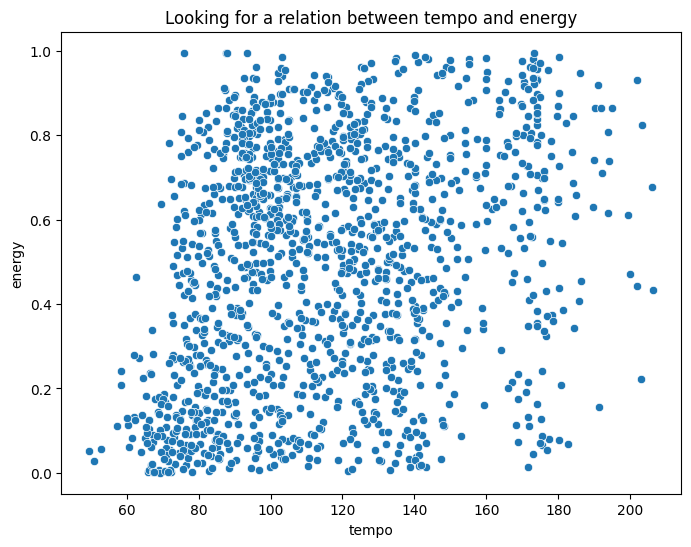

In [9]:
# Simple plot of maybe related numbers:
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=df1000songs, x='tempo', y='energy')
plt.title('Looking for a relation between tempo and energy')
plt.show()

In [10]:
# Applying KMean on it:
kmean_test = df1000songs[['energy','tempo']]
test_model = KMeans(n_clusters=5)
test_model.fit(kmean_test)
test_model.cluster_centers_
# Making another df out of it:
model_centroids = pd.DataFrame(test_model.cluster_centers_)
model_centroids.columns = ['energy','tempo']
model_centroids

c:\Users\AlexD\Desktop\Python\Python 3.10.6\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,energy,tempo
0,0.548469,98.039032
1,0.508509,141.386525
2,0.625946,174.532190
3,0.299276,76.965023
4,0.524786,120.593842


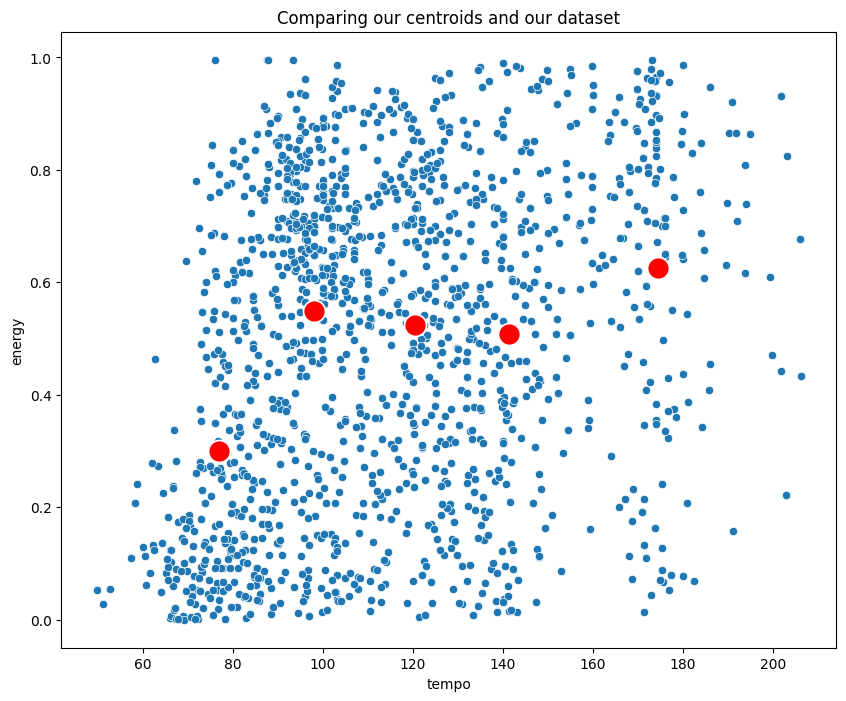

In [11]:
fig, ax = plt.subplots(figsize=(10, 8))

plt.title('Comparing our centroids and our dataset')
plt.xlabel('tempo')
plt.ylabel('energy')
sns.scatterplot(data=kmean_test, x='tempo', y='energy')
sns.scatterplot(data=model_centroids, x='tempo', y='energy', color='red', s=250)
plt.show()

 ## 2. K-Means on scaled Dataframe:

In [12]:
df1000songs.describe()

,energy,tempo
count,1440.000000,1440.000000
mean,0.494241,115.249066
std,0.281917,31.611805
min,0.000020,49.689000
25%,0.243000,91.014250
50%,0.529500,110.008000
75%,0.733000,135.587000
max,0.996000,206.313000


In [13]:
from sklearn.preprocessing import MinMaxScaler
my_scaler = MinMaxScaler().set_output(transform='pandas')
df1000songs_scaled = my_scaler.fit_transform(df1000songs)
# let's see the first 5 observations after normalising the data
df1000songs_scaled[:5]

,energy,tempo
name,,
All Shook Up,0.469869,0.156106
I've Got You Under My Skin - Remastered 1998,0.247977,0.494567
Smoke Gets In Your Eyes,0.227896,0.412383
"What'd I Say, Pt. 1 & 2",0.683728,0.247063
Dream A Little Dream Of Me,0.167654,0.168742


In [14]:
df1000songs_scaled.describe()

,energy,tempo
count,1440.000000,1440.000000
mean,0.496215,0.418583
std,0.283055,0.201832
min,0.000000,0.000000
25%,0.243960,0.263850
50%,0.531617,0.385120
75%,0.735938,0.548434
max,1.000000,1.000000


# K-means

In [15]:
from sklearn.cluster import KMeans

# Based on the quick look to the scatter plot, 
# we are going to assume there can be 5 different species.
my_model = KMeans(n_clusters=5)
my_model.fit(df1000songs_scaled)

c:\Users\AlexD\Desktop\Python\Python 3.10.6\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [16]:
my_model.cluster_centers_

array([[0.509995  , 0.34796353],
       [0.7847586 , 0.34774519],
       [0.76271988, 0.71328815],
       [0.24547813, 0.58726151],
       [0.14189055, 0.21901336]])

In [17]:
df1000songs_mod = pd.DataFrame(my_model.cluster_centers_)
df1000songs_mod.columns= ['energy','tempo']
df1000songs_mod

,energy,tempo
0,0.509995,0.347964
1,0.784759,0.347745
2,0.762720,0.713288
3,0.245478,0.587262
4,0.141891,0.219013


# Explore our KMeans results

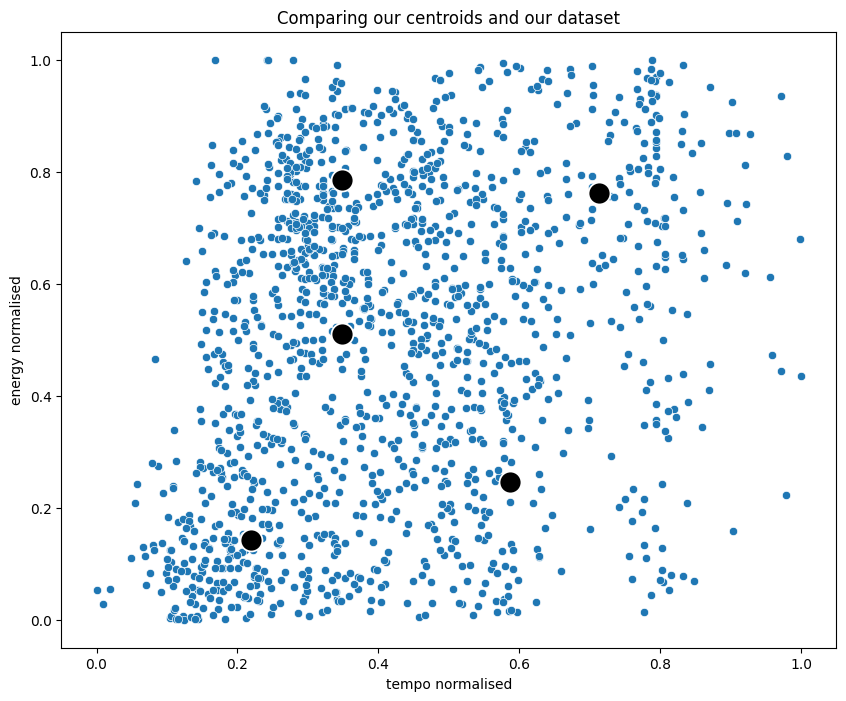

In [18]:
fig, ax = plt.subplots(figsize=(10, 8))
plot_data = pd.DataFrame(df1000songs_scaled)
plot_data.columns = ['energy','tempo']

plt.title('Comparing our centroids and our dataset')
plt.xlabel('tempo normalised')
plt.ylabel('energy normalised')
sns.scatterplot(data=plot_data, x='tempo', y='energy')
sns.scatterplot(data=df1000songs_mod, x='tempo', y='energy', color='black', s=250)
plt.show()

In [19]:
my_model.labels_

array([0, 3, 3, ..., 4, 4, 4])

# # Adding column clusters

In [20]:
df1000songs_scaled['cluster'] = my_model.labels_
df1000songs_scaled

,energy,tempo,cluster
name,,,
All Shook Up,0.469869,0.156106,0
I've Got You Under My Skin - Remastered 1998,0.247977,0.494567,3
Smoke Gets In Your Eyes,0.227896,0.412383,3
"What'd I Say, Pt. 1 & 2",0.683728,0.247063,1
Dream A Little Dream Of Me,0.167654,0.168742,4
...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",0.069660,0.244005,4
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.101387,0.213537,4
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",0.000913,0.139723,4


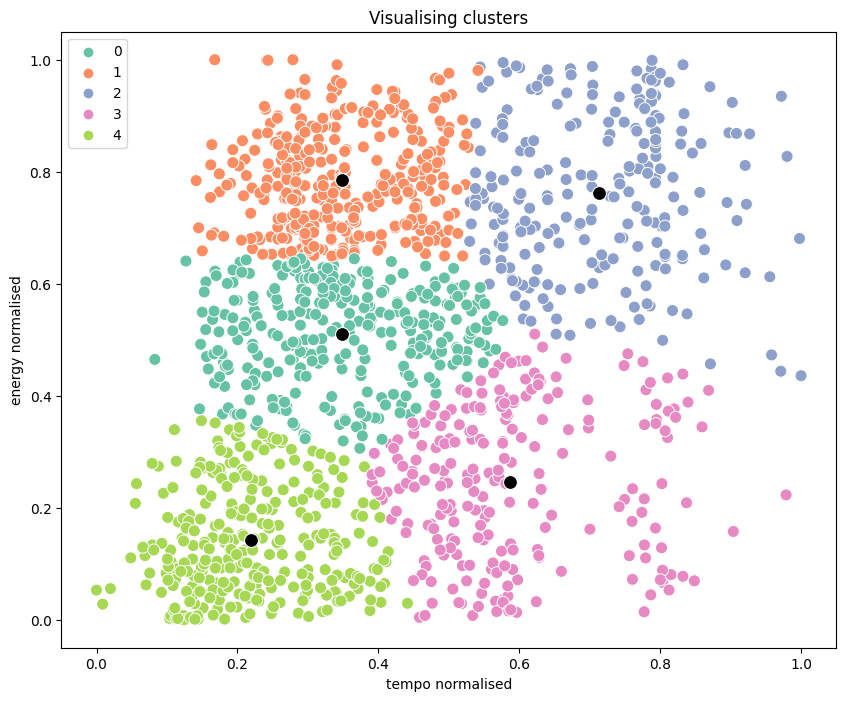

In [21]:
# create plot dataframe
# plot_data = pd.DataFrame(df1000songs_scaled)
# plot_data.columns = ['energy','tempo']
# plot_data['cluster'] = my_model.labels_

# size and plot titles
fig, ax = plt.subplots(figsize=(10, 8))
plt.title('Visualising clusters')
plt.xlabel('tempo normalised')
plt.ylabel('energy normalised')          

# scatter plot
sns.scatterplot(data=df1000songs_scaled, x='tempo', y='energy',hue='cluster', palette='Set2', s=75)
sns.scatterplot(data=df1000songs_mod, x='tempo', y='energy', color='black', s=100)
plt.show()